In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import pickle as pkl
from matplotlib import pyplot as plt

In [85]:
num_paras = pd.read_csv('Number of Trainable Parameters.csv')
num_paras

,Encoder,Hidden Size,Kernel Size,Interaction Way,Num of Parameters
0,RNN,50,NaN,Concatenation,220803
1,RNN,100,NaN,Concatenation,521603
2,RNN,200,NaN,Concatenation,1363203
3,RNN,300,NaN,Concatenation,2524803
4,RNN,400,NaN,Concatenation,4006403
5,RNN,100,NaN,Multiplication,501603
6,RNN,200,NaN,Multiplication,1283203
7,RNN,300,NaN,Multiplication,2344803
8,RNN,400,NaN,Multiplication,3686403
9,RNN,800,NaN,Multiplication,11852803


### RNN with Sentences Concatencation  v.s Hidden Size 

In [6]:
import pickle
rnn_cat_hidden_loss = pickle.load(open('rnn_cat_hidden_record_loss.pkl','rb'))
rnn_cat_hidden_acc =  pickle.load(open('rnn_cat_hidden_record_acc.pkl','rb'))

In [7]:
rnn_cat_hidden_loss.keys()

dict_keys(['hidden_size_50', 'hidden_size_100', 'hidden_size_200', 'hidden_size_300', 'hidden_size_400'])

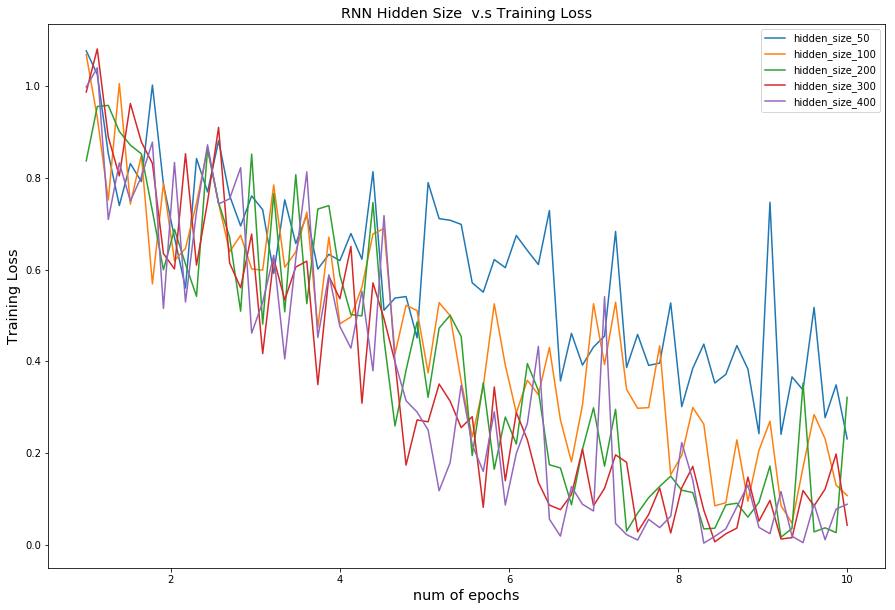

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
x = np.linspace(1,10,70)
for key,value in rnn_cat_hidden_loss.items():
    plt.plot( x ,value[0] ,label = key)
plt.xlabel('num of epochs',fontsize='x-large')
plt.ylabel('Training Loss',fontsize='x-large')
plt.title('RNN Hidden Size  v.s Training Loss',fontsize='x-large')
plt.legend()
plt.show()

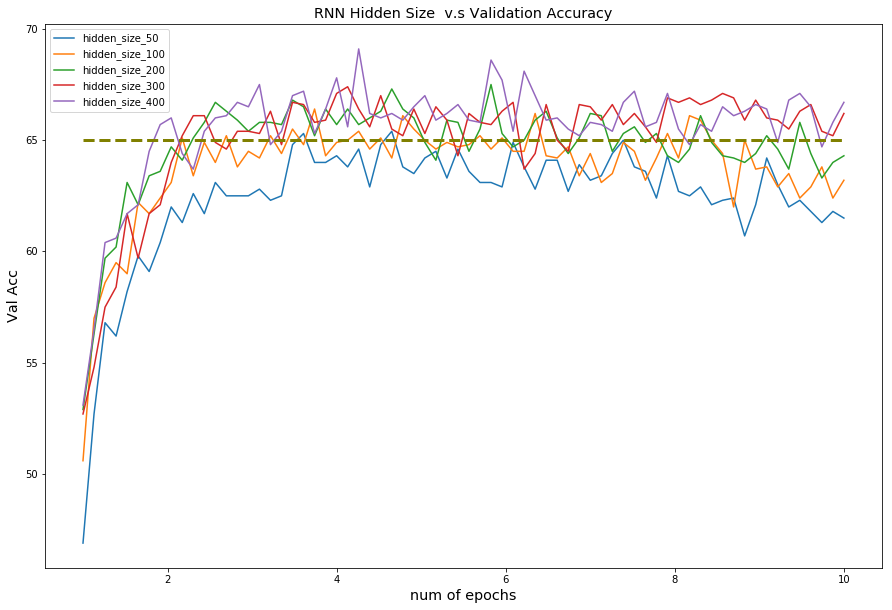

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
x = np.linspace(1,10,70)
for key,value in rnn_cat_hidden_loss.items():
    plt.plot( x ,value[1] ,label = key)
horiz_line_data = np.array([65 for i in range(len(x))])
plt.plot(x, horiz_line_data, color = 'olive', linewidth=3,linestyle='dashed') 
plt.xlabel('num of epochs',fontsize='x-large')
plt.ylabel('Val Acc',fontsize='x-large')
plt.title('RNN Hidden Size  v.s Validation Accuracy',fontsize='x-large')
plt.legend()
plt.show()

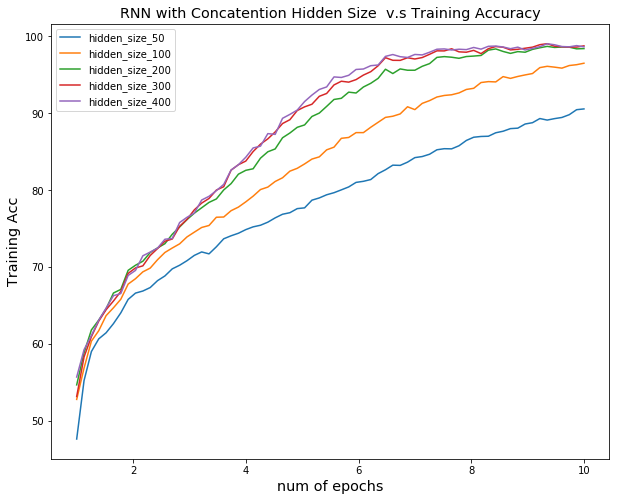

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
x = np.linspace(1,10,70)
for key,value in rnn_cat_hidden_acc.items():
    plt.plot( x ,value[-1] ,label = key)
#horiz_line_data = np.array([65 for i in range(len(x))])
#plt.plot(x, horiz_line_data, color = 'olive', linewidth=3,linestyle='dashed') 
plt.xlabel('num of epochs',fontsize='x-large')
plt.ylabel('Training Acc',fontsize='x-large')
plt.title('RNN with Concatention Hidden Size  v.s Training Accuracy',fontsize='x-large')
plt.legend()
plt.show()

### RNN with Sentences Multiplication  v.s Hidden Size 

In [21]:
rnn_mul_hidden_loss = pickle.load(open('rnn_mul_hidden_record_loss.pkl', 'rb'))
rnn_mul_hidden_acc = pickle.load(open('rnn_mul_hidden_record_acc.pkl','rb'))

In [22]:
rnn_mul_hidden_acc.keys()

dict_keys(['hidden_size_300', 'hidden_size_400', 'hidden_size_200', 'hidden_size_100', 'hidden_size_800'])

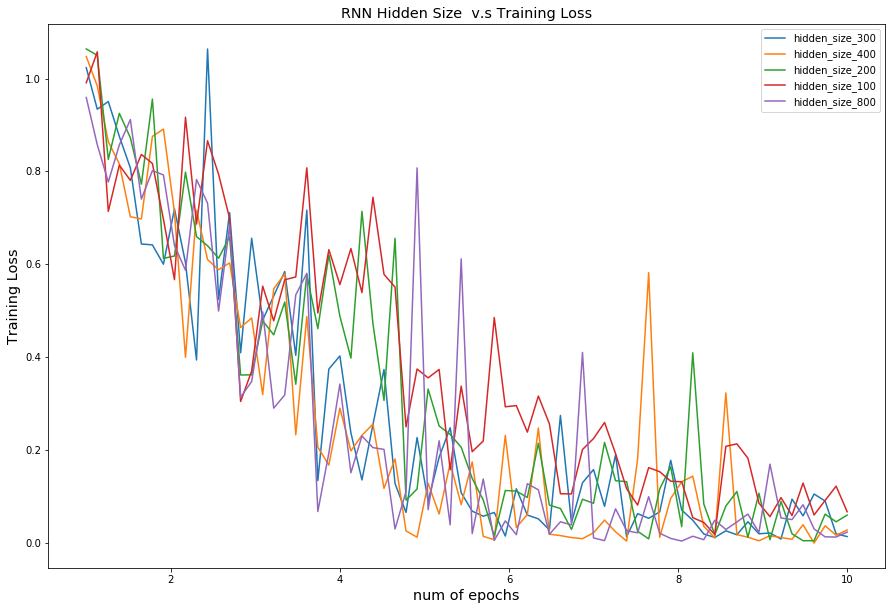

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
x = np.linspace(1,10,70)
for key,value in rnn_mul_hidden_loss.items():
    plt.plot( x ,value[0] ,label = key)
plt.xlabel('num of epochs',fontsize='x-large')
plt.ylabel('Training Loss',fontsize='x-large')
plt.title('RNN Hidden Size  v.s Training Loss',fontsize='x-large')
plt.legend()
plt.show()

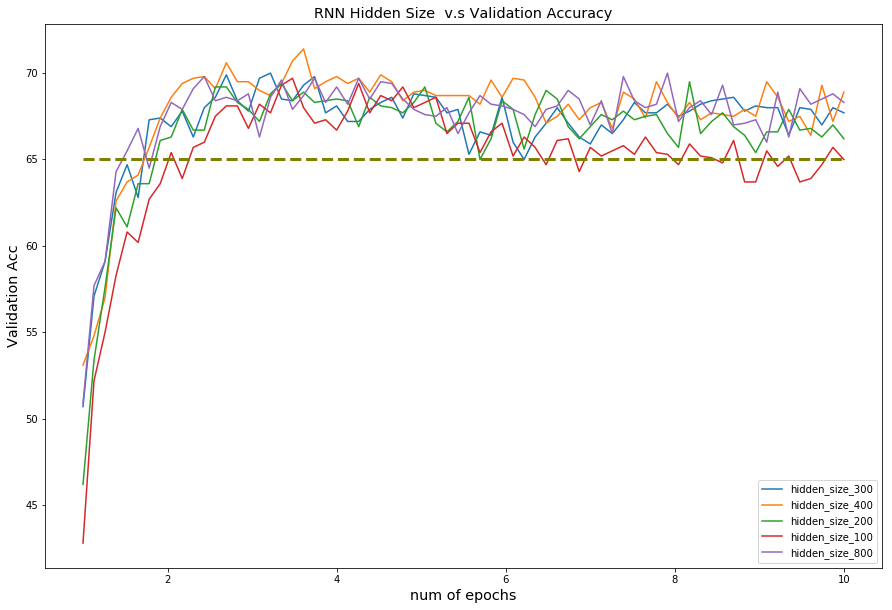

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
x = np.linspace(1,10,70)
for key,value in rnn_mul_hidden_loss.items():
    plt.plot( x ,value[1] ,label = key)
horiz_line_data = np.array([65 for i in range(len(x))])
plt.plot(x, horiz_line_data, color = 'olive', linewidth=3,linestyle='dashed') 
plt.xlabel('num of epochs',fontsize='x-large')
plt.ylabel('Validation Acc',fontsize='x-large')
plt.title('RNN Hidden Size  v.s Validation Accuracy',fontsize='x-large')
plt.legend()
plt.show()

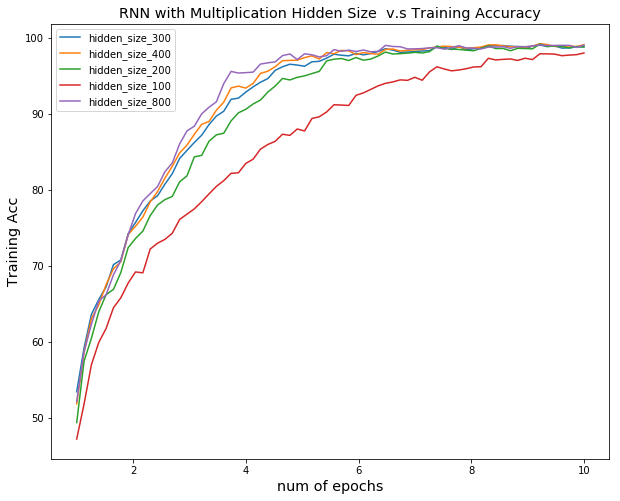

In [23]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
x = np.linspace(1,10,70)
for key,value in rnn_mul_hidden_acc.items():
    plt.plot( x ,value[-1] ,label = key)
#horiz_line_data = np.array([65 for i in range(len(x))])
#plt.plot(x, horiz_line_data, color = 'olive', linewidth=3,linestyle='dashed') 
plt.xlabel('num of epochs',fontsize='x-large')
plt.ylabel('Training Acc',fontsize='x-large')
plt.title('RNN with Multiplication Hidden Size  v.s Training Accuracy',fontsize='x-large')
plt.legend()
plt.show()

### RNN with different interaction ways of encoded sentences

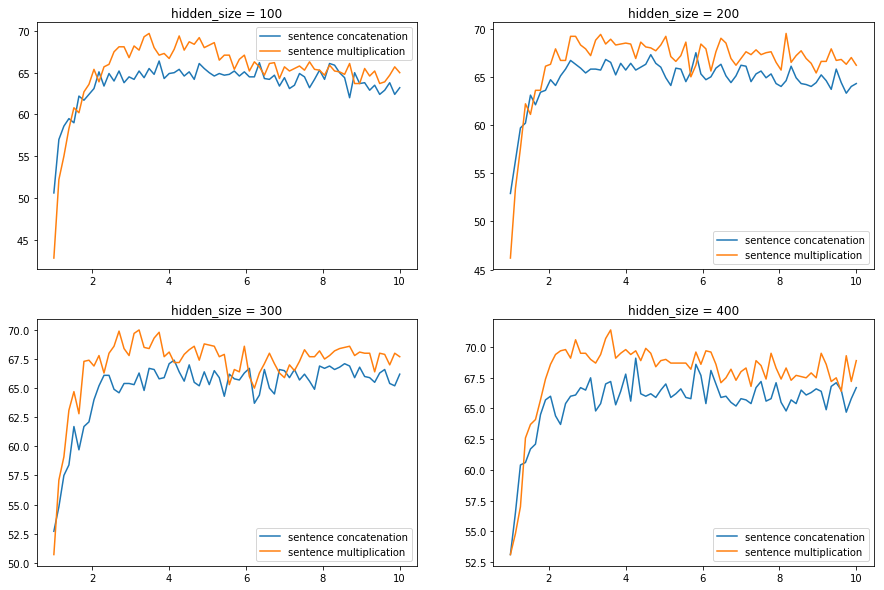

In [24]:
plt.figure(figsize=(15,10))
x = np.linspace(1,10,70)
#for keys in list(performa_rnn_mul.keys())[:-1]:
y1 = rnn_cat_hidden_loss['hidden_size_100'][1]
y2 = rnn_mul_hidden_loss['hidden_size_100'][1]
ax1 = plt.subplot(221)
ax1.set_title('hidden_size = 100')
plt.plot(x, y1, label = 'sentence concatenation')
plt.plot(x, y2 , label ='sentence multiplication')
ax2 = plt.subplot(222)
ax2.set_title('hidden_size = 200')
y3 = rnn_cat_hidden_loss['hidden_size_200'][1]
y4 = rnn_mul_hidden_loss['hidden_size_200'][1]
plt.plot(x, y3, label = 'sentence concatenation')
plt.plot(x, y4, label = 'sentence multiplication')
ax3 = plt.subplot(223)
ax3.set_title('hidden_size = 300')
y5 = rnn_cat_hidden_loss['hidden_size_300'][1]
y6 = rnn_mul_hidden_loss['hidden_size_300'][1]
plt.plot(x, y5, label = 'sentence concatenation')
plt.plot(x, y6, label = 'sentence multiplication')
ax4 = plt.subplot(224)
ax4.set_title('hidden_size = 400')
y7 = rnn_cat_hidden_loss['hidden_size_400'][1]
y8 = rnn_mul_hidden_loss['hidden_size_400'][1]
plt.plot(x, y7, label = 'sentence concatenation')
plt.plot(x, y8, label = 'sentence multiplication')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

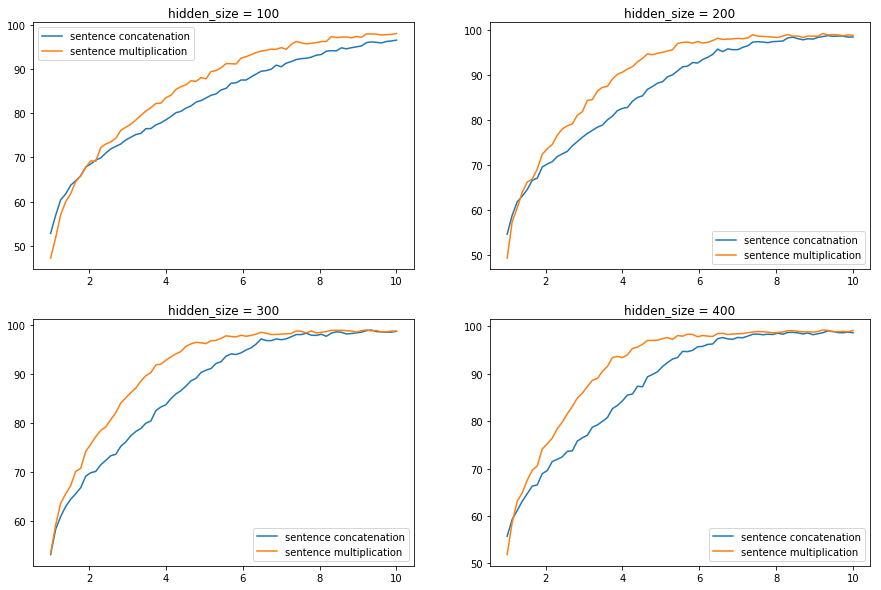

In [25]:
plt.figure(figsize=(15,10))
x = np.linspace(1,10,70)
#for keys in list(performa_rnn_mul.keys())[:-1]:
y1 = rnn_cat_hidden_acc['hidden_size_100'][-1]
y2 = rnn_mul_hidden_acc['hidden_size_100'][-1]
ax1 = plt.subplot(221)
ax1.set_title('hidden_size = 100')
plt.plot(x, y1, label = 'sentence concatenation')
plt.plot(x, y2 , label ='sentence multiplication')
ax2 = plt.subplot(222)
ax2.set_title('hidden_size = 200')
y3 = rnn_cat_hidden_acc['hidden_size_200'][-1]
y4 = rnn_mul_hidden_acc['hidden_size_200'][-1]
plt.plot(x, y3, label = 'sentence concatnation')
plt.plot(x, y4, label = 'sentence multiplication')
ax3 = plt.subplot(223)
ax3.set_title('hidden_size = 300')
y5 = rnn_cat_hidden_acc['hidden_size_300'][-1]
y6 = rnn_mul_hidden_acc['hidden_size_300'][-1]
plt.plot(x, y5, label = 'sentence concatenation')
plt.plot(x, y6, label = 'sentence multiplication')
ax4 = plt.subplot(224)
ax4.set_title('hidden_size = 400')
y7 = rnn_cat_hidden_acc['hidden_size_400'][-1]
y8 = rnn_mul_hidden_acc['hidden_size_400'][-1]
plt.plot(x, y7, label = 'sentence concatenation')
plt.plot(x, y8, label = 'sentence multiplication')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

### CNN with Sentences Concatenation  v.s Hidden Size 

In [51]:
cnn_cat_hidden_loss = pickle.load(open('cnn_cat_hidden_record_loss.pkl','rb'))
cnn_mul_hidden_loss = pickle.load(open('cnn_mul_hidden_loss.pkl','rb'))
cnn_cat_hidden_acc = pickle.load(open('cnn_cat_hidden_record_acc.pkl','rb'))

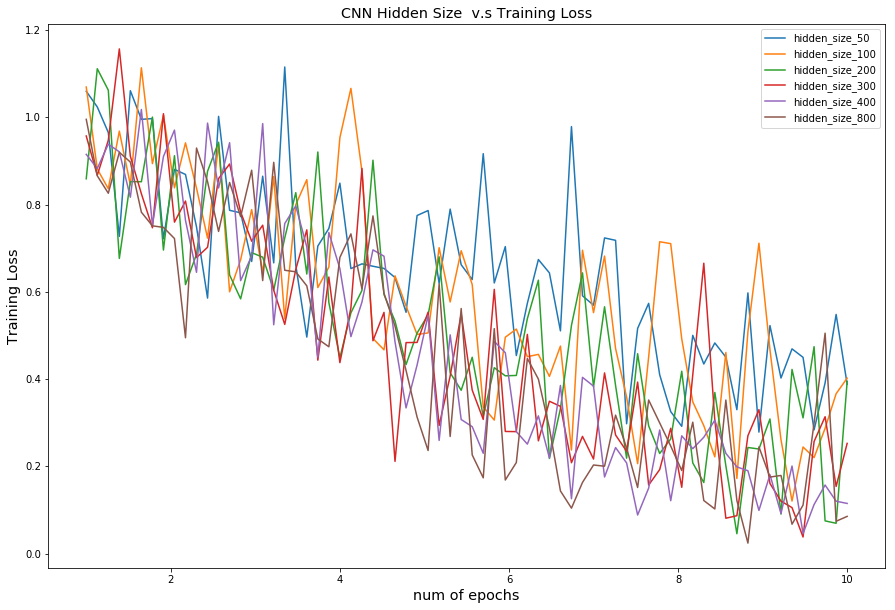

In [30]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
x = np.linspace(1,10,70)
for key,value in cnn_cat_hidden_loss.items():
    plt.plot( x ,value[0] ,label = key)
plt.xlabel('num of epochs',fontsize='x-large')
plt.ylabel('Training Loss',fontsize='x-large')
plt.title('CNN Hidden Size  v.s Training Loss',fontsize='x-large')
plt.legend()
plt.show()

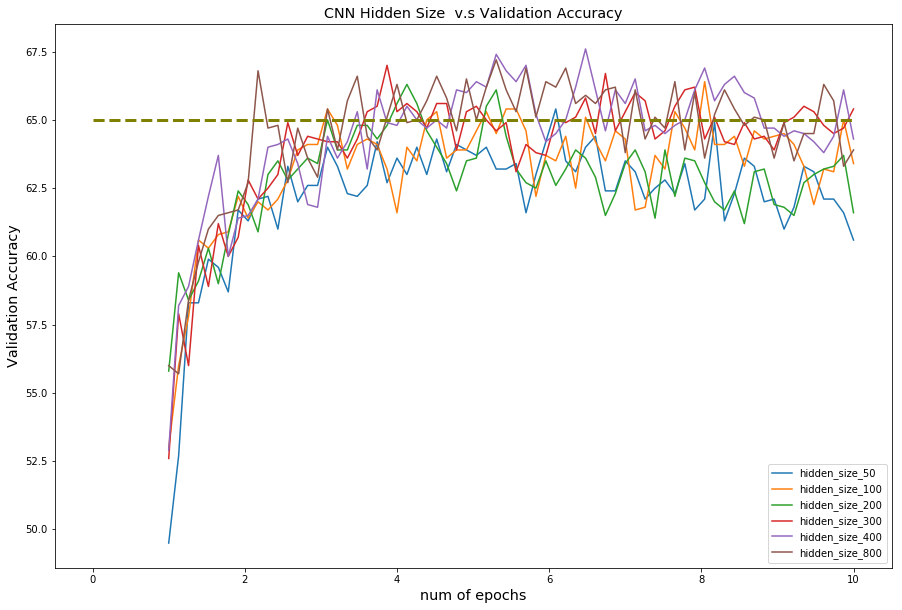

In [31]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
x = np.linspace(1,10,70)
for key,value in cnn_cat_hidden_loss.items():
    plt.plot( x ,value[1] ,label = key)
horiz_line_data = np.array([65 for i in range(80)])
plt.plot(np.linspace(0,10,80), horiz_line_data, color = 'olive', linewidth=3,linestyle='dashed') 
plt.xlabel('num of epochs',fontsize='x-large')
plt.ylabel('Validation Accuracy',fontsize='x-large')
plt.title('CNN Hidden Size  v.s Validation Accuracy',fontsize='x-large')
plt.legend()
plt.show()

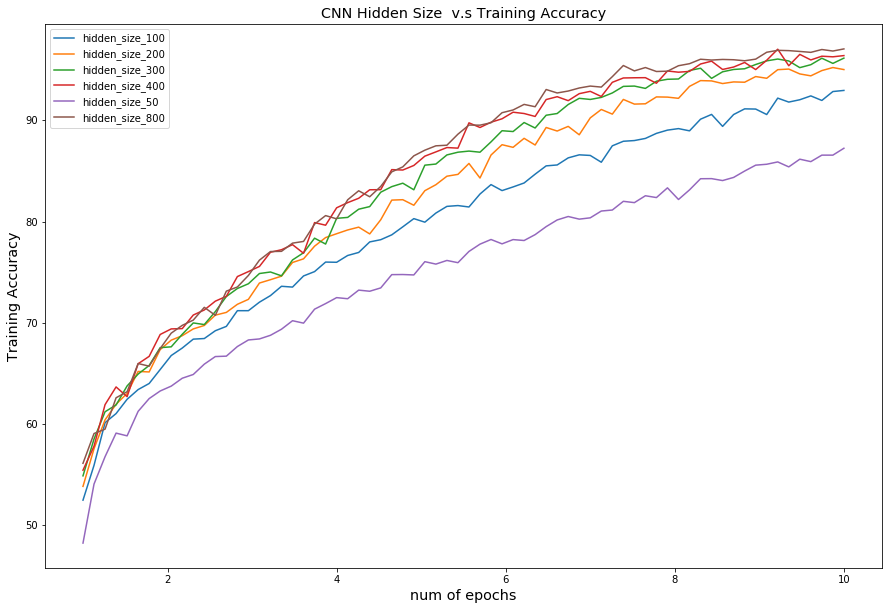

In [55]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
x = np.linspace(1,10,70)
for key,value in cnn_cat_hidden_acc.items():
    plt.plot( x ,value[-1] ,label = key)
#horiz_line_data = np.array([65 for i in range(80)])
#plt.plot(np.linspace(0,10,80), horiz_line_data, color = 'olive', linewidth=3,linestyle='dashed') 
plt.xlabel('num of epochs',fontsize='x-large')
plt.ylabel('Training Accuracy',fontsize='x-large')
plt.title('CNN Hidden Size  v.s Training Accuracy',fontsize='x-large')
plt.legend()
plt.show()

### CNN with Sentences Multiplication  v.s Hidden Size 

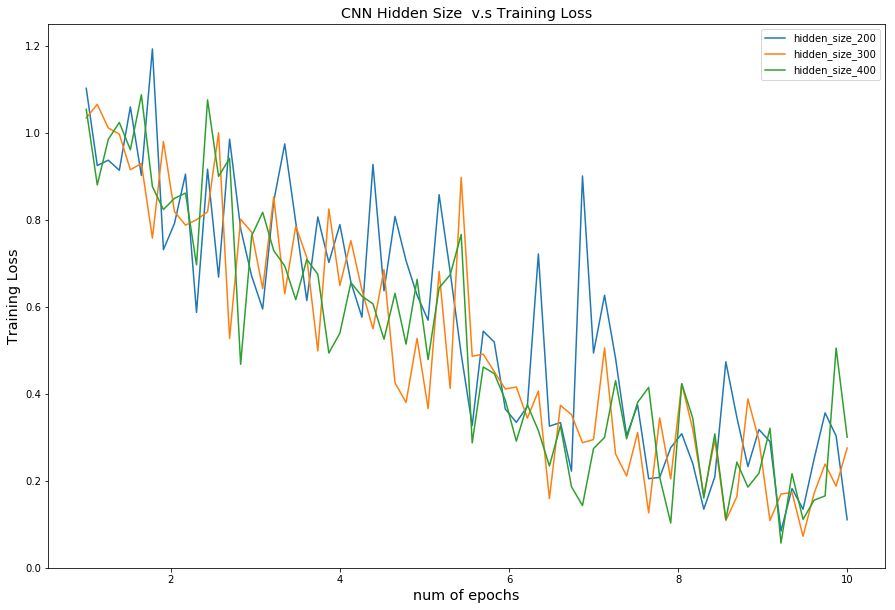

In [32]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
x = np.linspace(1,10,70)
for key,value in cnn_mul_hidden_loss.items():
    plt.plot( x ,value[0] ,label = key)
plt.xlabel('num of epochs',fontsize='x-large')
plt.ylabel('Training Loss',fontsize='x-large')
plt.title('CNN Hidden Size  v.s Training Loss',fontsize='x-large')
plt.legend()
plt.show()

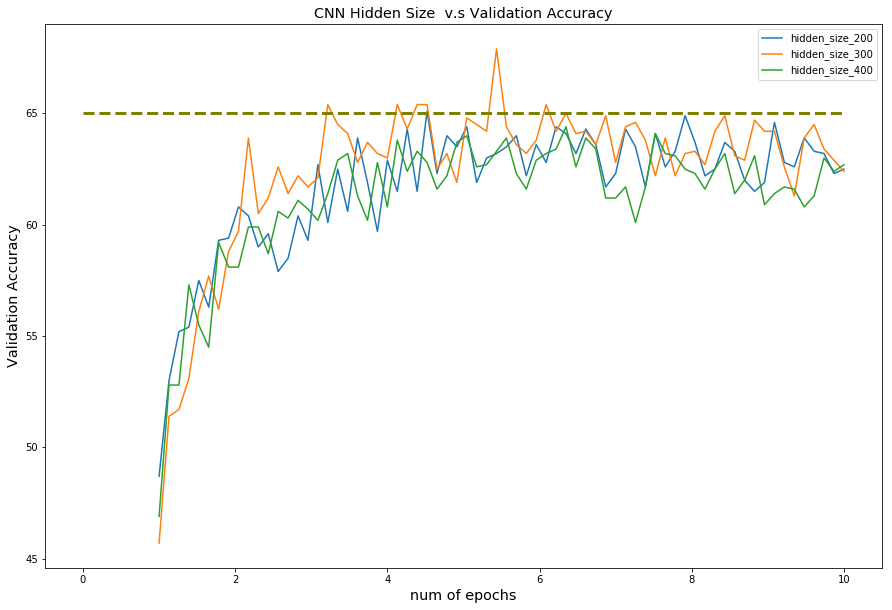

In [33]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
x = np.linspace(1,10,70)
for key,value in cnn_mul_hidden_loss.items():
    plt.plot( x ,value[1] ,label = key)
horiz_line_data = np.array([65 for i in range(80)])
plt.plot(np.linspace(0,10,80), horiz_line_data, color = 'olive', linewidth=3,linestyle='dashed') 
plt.xlabel('num of epochs',fontsize='x-large')
plt.ylabel('Validation Accuracy',fontsize='x-large')
plt.title('CNN Hidden Size  v.s Validation Accuracy',fontsize='x-large')
plt.legend()
plt.show()

### CNN with different interaction ways of encoded sentences

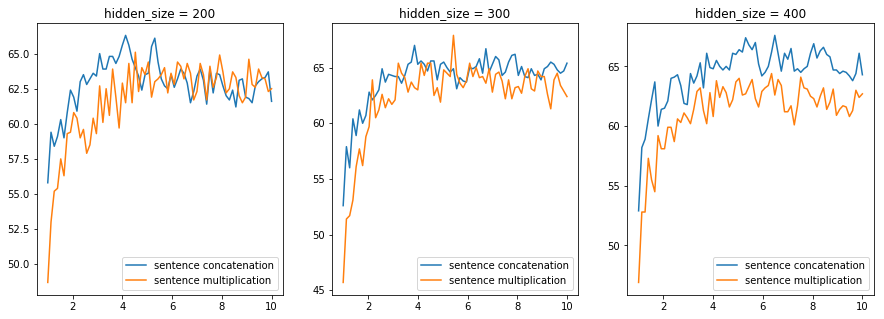

In [34]:
plt.figure(figsize=(15,5))
x = np.linspace(1,10,70)
#for keys in list(performa_rnn_mul.keys())[:-1]:
y1 = cnn_cat_hidden_loss['hidden_size_200'][1]
y2 = cnn_mul_hidden_loss['hidden_size_200'][1]
ax1 = plt.subplot(131)
ax1.set_title('hidden_size = 200')
plt.plot(x, y1, label = 'sentence concatenation')
plt.plot(x, y2 , label ='sentence multiplication')
ax2 = plt.subplot(132)
ax2.set_title('hidden_size = 300')
y3 = cnn_cat_hidden_loss['hidden_size_300'][1]
y4 = cnn_mul_hidden_loss['hidden_size_300'][1]
plt.plot(x, y3, label = 'sentence concatenation')
plt.plot(x, y4, label = 'sentence multiplication')
ax3 = plt.subplot(133)
ax3.set_title('hidden_size = 400')
y5 = cnn_cat_hidden_loss['hidden_size_400'][1]
y6 = cnn_mul_hidden_loss['hidden_size_400'][1]
plt.plot(x, y5, label = 'sentence concatenation')
plt.plot(x, y6, label = 'sentence multiplication')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

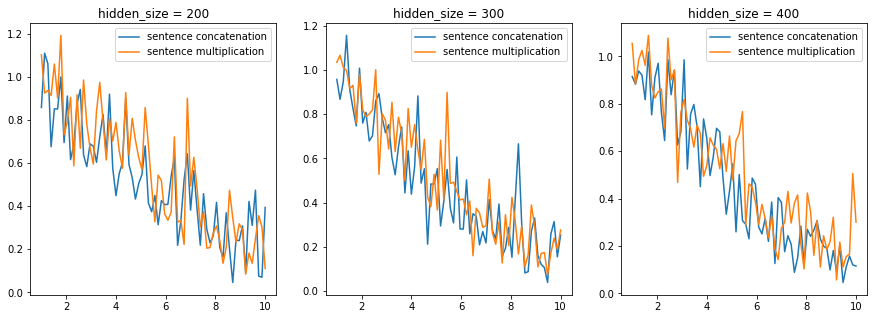

In [86]:
plt.figure(figsize=(15,5))
x = np.linspace(1,10,70)
#for keys in list(performa_rnn_mul.keys())[:-1]:
y1 = cnn_cat_hidden_loss['hidden_size_200'][0]
y2 = cnn_mul_hidden_loss['hidden_size_200'][0]
ax1 = plt.subplot(131)
ax1.set_title('hidden_size = 200')
plt.plot(x, y1, label = 'sentence concatenation')
plt.plot(x, y2 , label ='sentence multiplication')
ax2 = plt.subplot(132)
ax2.set_title('hidden_size = 300')
y3 = cnn_cat_hidden_loss['hidden_size_300'][0]
y4 = cnn_mul_hidden_loss['hidden_size_300'][0]
plt.plot(x, y3, label = 'sentence concatenation')
plt.plot(x, y4, label = 'sentence multiplication')
ax3 = plt.subplot(133)
ax3.set_title('hidden_size = 400')
y5 = cnn_cat_hidden_loss['hidden_size_400'][0]
y6 = cnn_mul_hidden_loss['hidden_size_400'][0]
plt.plot(x, y5, label = 'sentence concatenation')
plt.plot(x, y6, label = 'sentence multiplication')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

### CNN with concatenation v.s. Kernel size

In [71]:
cnn_cat_kernel_acc = pickle.load(open('cnn_cat_kernel_record_acc.pkl','rb'))
cnn_cat_kernel_loss = pickle.load(open('cnn_cat_kernel_record_loss.pkl','rb'))

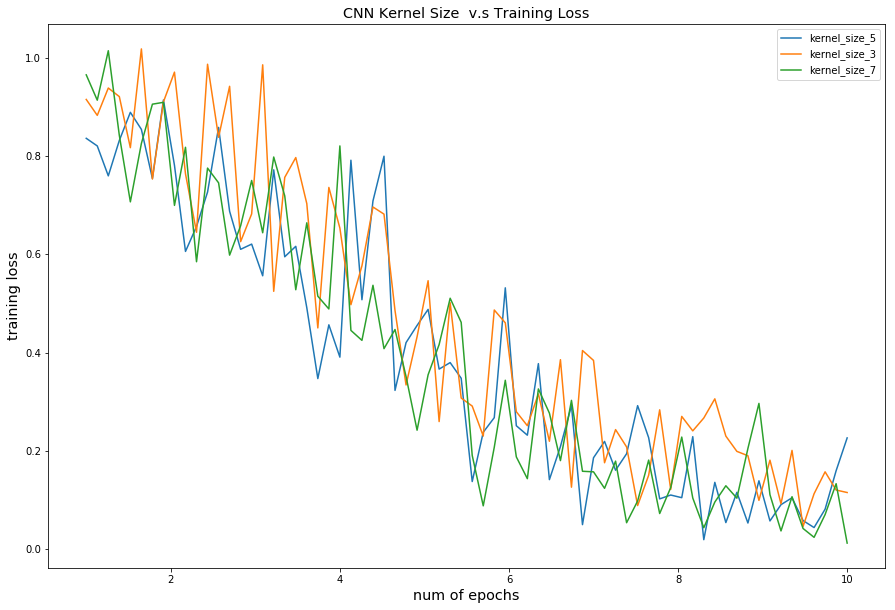

In [72]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
x = np.linspace(1,10,70)
for key,value in cnn_cat_kernel_loss.items():
    plt.plot( x ,value[0] ,label = key)
plt.xlabel('num of epochs',fontsize='x-large')
plt.ylabel('training loss',fontsize='x-large')
plt.title('CNN Kernel Size  v.s Training Loss',fontsize='x-large')
plt.legend()
plt.show()

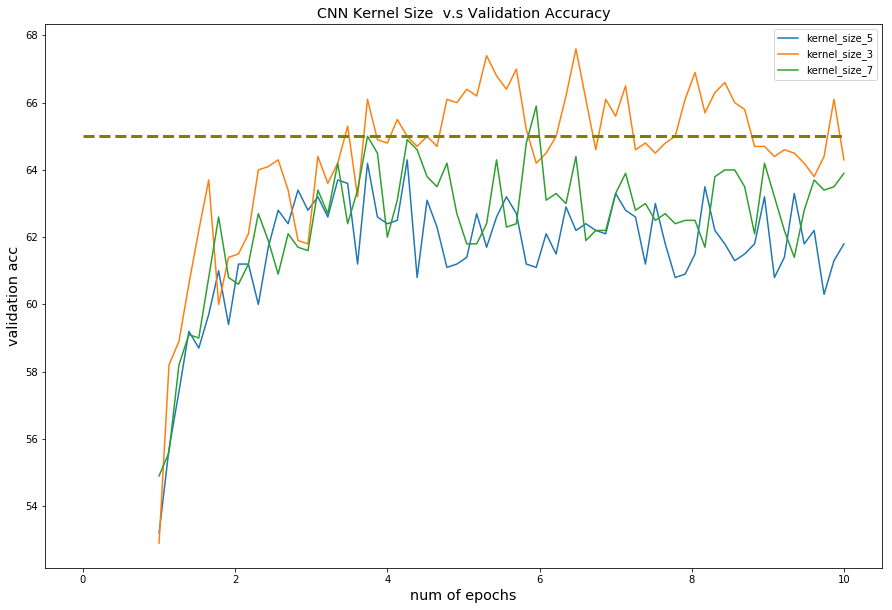

In [73]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
x = np.linspace(1,10,70)
for key,value in cnn_cat_kernel_loss.items():
    plt.plot( x ,value[1] ,label = key)
horiz_line_data = np.array([65 for i in range(80)])
plt.plot(np.linspace(0,10,80), horiz_line_data, color = 'olive', linewidth=3,linestyle='dashed') 
plt.xlabel('num of epochs',fontsize='x-large')
plt.ylabel('validation acc',fontsize='x-large')
plt.title('CNN Kernel Size  v.s Validation Accuracy',fontsize='x-large')
plt.legend()
plt.show()

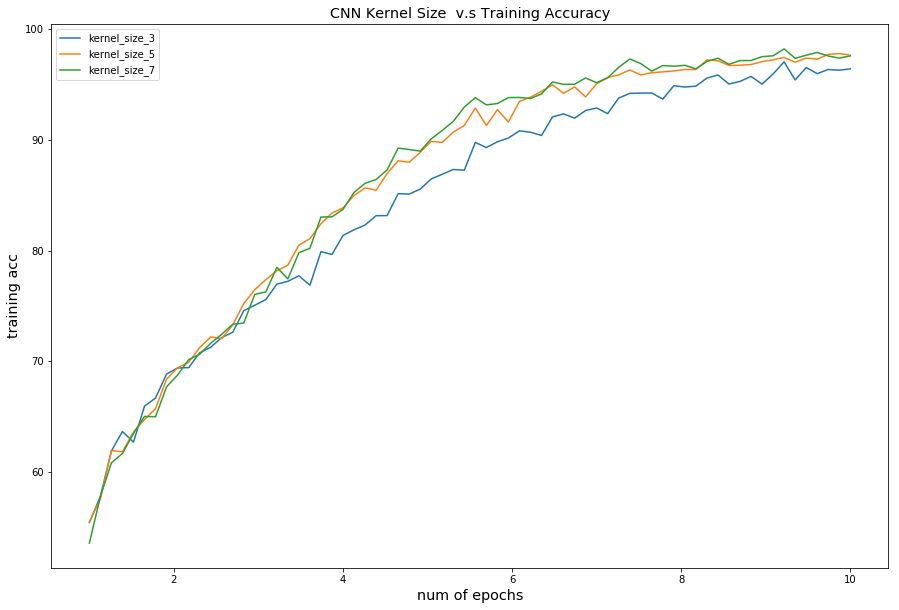

In [75]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
x = np.linspace(1,10,70)
for key,value in cnn_cat_kernel_acc.items():
    plt.plot( x ,value[-1] ,label = key) 
plt.xlabel('num of epochs',fontsize='x-large')
plt.ylabel('training acc',fontsize='x-large')
plt.title('CNN Kernel Size  v.s Training Accuracy',fontsize='x-large')
plt.legend()
plt.show()